In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
print(df)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [4]:
df = pd.read_csv("AirPassengers.csv", header=None, names=["Month","Passengers"])

In [12]:
import tensorflow
import tflearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.python.framework import ops
ops.reset_default_graph()

#tensorflow.reset_default_graph() #モデルを初期化

df = pd.read_csv('AirPassengers.csv',usecols=[1])
dataset = df.values
dataset = df.astype('float32')
dataset = (dataset - np.min(dataset))/(np.max(dataset)-np.min(dataset))

dataset = np.array(dataset)

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [13]:
def create_dataset(dataset, steps_of_history, steps_in_future):
    X, Y = [], []
    for i in range(0, len(dataset)-steps_of_history, steps_in_future):
        X.append(dataset[i:i+steps_of_history])
        Y.append(dataset[i + steps_of_history])
    X = np.reshape(np.array(X), [-1, steps_of_history, 1])
    Y = np.reshape(np.array(Y), [-1, 1])
    return X, Y

def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos], y[:pos]
    testX, testY   = x[pos:], y[pos:]
    return trainX, trainY, testX, testY

steps_of_history = 1
steps_in_future = 1

X, Y = create_dataset(dataset, steps_of_history, steps_in_future)
trainX, trainY, testX, testY = split_data(X, Y, test_size = 0.33)

net = tflearn.input_data(shape=[None, steps_of_history, 1])
net = tflearn.lstm(net, n_units=6)
net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model = tflearn.DNN(net, tensorboard_verbose=0)

model.fit(trainX, trainY, validation_set=0.1, batch_size=1, n_epoch=150)

test_predict = model.predict(testX)

rmse = np.sqrt(np.mean((test_predict-testY)**2))
print(rmse)

Training Step: 12899  | total loss: 0.00158 | time: 0.398s
| Adam | epoch: 150 | loss: 0.00158 -- iter: 85/86
Training Step: 12900  | total loss: 0.00199 | time: 1.413s
| Adam | epoch: 150 | loss: 0.00199 | val_loss: 0.00160 -- iter: 86/86
--
0.09959213


ValueError: x and y can be no greater than 2-D, but have shapes (143,) and (143, 1, 1)

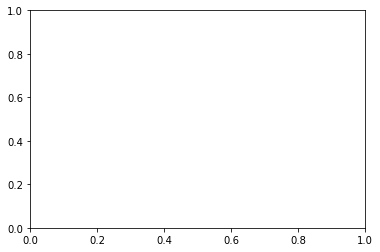

In [33]:
plt.plot(X.tolist())

In [16]:
import matplotlib.pyplot as plt

ValueError: x and y can be no greater than 2-D, but have shapes (96,) and (96, 1, 1)

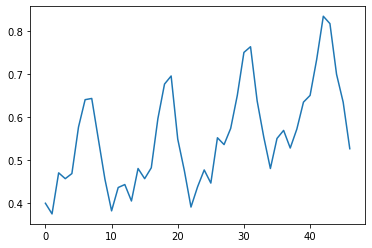

In [26]:
plt.plot(test_predict)
